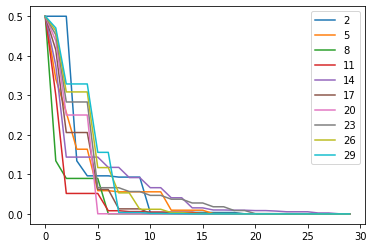

In [110]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import base_psx.grid_bubble, base_psx.base
import importlib
from matplotlib import animation
importlib.reload(base_psx.grid_bubble)

def func(x):
    return x**2 + np.cos(x + 2)

def dfunc(x):
    return 2*x - np.sin(x + 2)

def func2(x):
    return np.sin(x)

def dfunc2(x):
    return np.cos(x)

def func3(x):
    return np.log(x)

def dfunc3(x):
    return 1/x

def loss3(r, epsilon):
    x = np.pi/3
    loss = np.abs(base_psx.base.param_shift(func3, x, r, epsilon) - dfunc3(x))
    return loss

def loss2(r, epsilon):
    x = np.pi/3
    loss = np.abs(base_psx.base.param_shift(func2, x, r, epsilon) - dfunc2(x))
    return loss
def loss(r, epsilon):
    x = np.pi/3
    loss = np.abs(base_psx.base.param_shift(func, x, r, epsilon) - dfunc(x))
    return loss

for i in range(2, 30, 3):
    grid_bubble = base_psx.grid_bubble.GridBubble(loss_func = loss2, radius = 5)
    solution = grid_bubble.fit(learning_rate = i, threshold=10**(-10))
    plt.plot(grid_bubble.min_losses[:30], label = i)
plt.legend()
# grid_bubble.plot(path = './test/')

What the strategy to adapt the best R

In [98]:
r*(func(np.pi/3 + s) - func(np.pi/3 - s))

2.008930947029046

In [105]:
import glob
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("./test/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('a.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1000)